In [1]:
# basic imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from unyt import kW, minute, hour, day, MW
import sys

# osier imports
from osier import DispatchModel
import osier.tech_library as lib

# automatically set the solver
if "darwin" in sys.platform:
    solver = 'cplex_direct'
elif "linux" in sys.platform:
    solver = "cbc"
else:
    solver = "cbc"

print(f"Solver set: {solver}")

TypeError: 'tuple' object does not support item assignment

In [3]:
#creating energy mix

#based off osier documentation, we need to include geothermal and add the capacity for coal
#adding capacity of coal, based on research
from osier.tech_library import coal

# modify the capacity
#https://www.epa.gov/system/files/documents/2023-05/Power%20Sector%20Trends%20TSD.pdf
coal.capacity = 893*MW
display(coal)

#adding geothermal technology
#capacity: https://link.springer.com/article/10.1134/S0040601517040097
from osier import Technology
geotherm = Technology(technology_name="geotherm")
geotherm = Technology(technology_name="geotherm",
                              technology_type="production",
                              dispatchable=True,
                              renewable=True,
                              capacity=37.4*MW,
                              capital_cost=2500*kW**-1,
                              fuel_cost=0.07*(kW*hr)**-1,
                              capacity_factor=1.0,
                              lifecycle_co2_rate=0.0,
                              lifetime=1000,
                              om_cost_fixed=0.048*(kW)**-1)

#finally, create the necessary energy mix
UIUC_mix = [lib.natural_gas,lib.coal,lib.solar,geotherm]
display(UIUC_mix)

ModuleNotFoundError: No module named 'osier.tech_library'

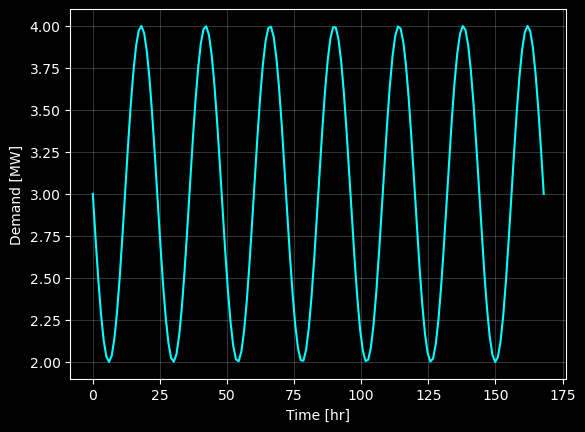

In [7]:
#creating demand profile
#taking pre-exisiting demand profile from the OSIER examples
#only looking over a week 
n_hours = 24  # hours per day
n_days = 7  # days to model
N = n_hours*n_days  # total number of time steps
phase_shift = 0  # horizontal shift [radians]
base_shift = 2  # vertical shift [units of demand]
hours = np.linspace(0,N,N)
demand = (np.sin((hours*np.pi/n_hours*2+phase_shift))*-1+np.ones(N)*(base_shift+1))

with plt.style.context("dark_background"):
    plt.plot(hours, demand, color='cyan')
    plt.grid(alpha=0.2)
    plt.ylabel('Demand [MW]')
    plt.xlabel('Time [hr]')
    plt.show()

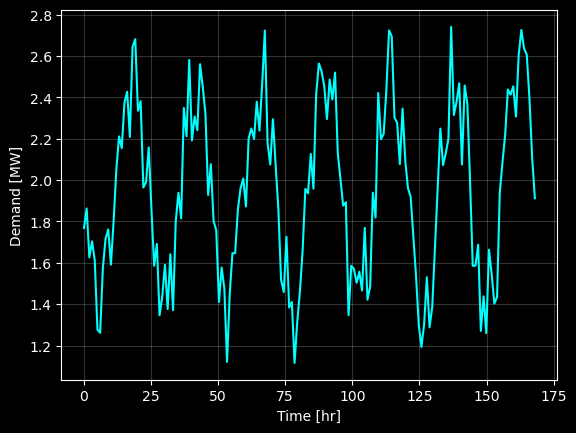

In [8]:
#need demand from UIUC
#from here: https://icap.sustainability.illinois.edu/metric/total-electric-usage-all-campus-kilowatt-hours-kwh

total_demand = 328.16  # [MWh], sets the total demand [units of energy]
demand = (np.sin((hours*np.pi/n_hours*2+phase_shift))*-1+np.ones(N)*(base_shift+1))

np.random.seed(1234) # sets the seed for repeatability

noise = np.random.random(N)
demand += noise

demand = demand/demand.sum() * total_demand  # rescale

with plt.style.context("dark_background"):
    plt.plot(hours, demand, color='cyan')
    plt.ylabel('Demand [MW]')
    plt.xlabel('Time [hr]')
    plt.grid(alpha=0.2)
    plt.show()

In [9]:
#running model
import time
start = time.perf_counter()
model = DispatchModel(technology_list=UIUC_mix,
                      net_demand=demand
                     )
model.solve(solver=solver)  # add your preferred solver here!
end = time.perf_counter()
print(model.objective)
print(f"Model ran in {(end-start):3f} seconds.")

NameError: name 'DispatchModel' is not defined

In [ ]:
# basic imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from unyt import kW, minute, hour, day, MW
import sys

# osier imports
from osier import DispatchModel
import osier.tech_library as lib

# automatically set the solver
if "darwin" in sys.platform:
    solver = 'cplex_direct'
elif "linux" in sys.platform:
    solver = "cbc"
else:
    solver = "cbc"

print(f"Solver set: {solver}")
#creating energy mix

#based off osier documentation, we need to include geothermal and add the capacity for coal
#adding capacity of coal, based on research
from osier.tech_library import coal

# modify the capacity
#https://www.epa.gov/system/files/documents/2023-05/Power%20Sector%20Trends%20TSD.pdf
coal.capacity = 893*MW
display(coal)

#adding geothermal technology
#capacity: https://link.springer.com/article/10.1134/S0040601517040097
from osier import Technology
geotherm = Technology(technology_name="geotherm")
geotherm = Technology(technology_name="geotherm",
                              technology_type="production",
                              dispatchable=True,
                              renewable=True,
                              capacity=37.4*MW,
                              capital_cost=2500*kW**-1,
                              fuel_cost=0.07*(kW*hr)**-1,
                              capacity_factor=1.0,
                              lifecycle_co2_rate=0.0,
                              lifetime=1000,
                              om_cost_fixed=0.048*(kW)**-1)

#finally, create the necessary energy mix
UIUC_mix = [lib.natural_gas,lib.coal,lib.solar,geotherm]
display(UIUC_mix)
#creating demand profile
#taking pre-exisiting demand profile from the OSIER examples
#only looking over a week 
n_hours = 24  # hours per day
n_days = 7  # days to model
N = n_hours*n_days  # total number of time steps
phase_shift = 0  # horizontal shift [radians]
base_shift = 2  # vertical shift [units of demand]
hours = np.linspace(0,N,N)
demand = (np.sin((hours*np.pi/n_hours*2+phase_shift))*-1+np.ones(N)*(base_shift+1))

with plt.style.context("dark_background"):
    plt.plot(hours, demand, color='cyan')
    plt.grid(alpha=0.2)
    plt.ylabel('Demand [MW]')
    plt.xlabel('Time [hr]')
    plt.show()
#need demand from UIUC
#from here: https://icap.sustainability.illinois.edu/metric/total-electric-usage-all-campus-kilowatt-hours-kwh

total_demand = 328.16  # [MWh], sets the total demand [units of energy]
demand = (np.sin((hours*np.pi/n_hours*2+phase_shift))*-1+np.ones(N)*(base_shift+1))

np.random.seed(1234) # sets the seed for repeatability

noise = np.random.random(N)
demand += noise

demand = demand/demand.sum() * total_demand  # rescale

with plt.style.context("dark_background"):
    plt.plot(hours, demand, color='cyan')
    plt.ylabel('Demand [MW]')
    plt.xlabel('Time [hr]')
    plt.grid(alpha=0.2)
    plt.show()

#running model
import time
start = time.perf_counter()
model = DispatchModel(technology_list=UIUC_mix,
                      net_demand=demand
                     )
model.solve(solver=solver)  # add your preferred solver here!
end = time.perf_counter()
print(model.objective)
print(f"Model ran in {(end-start):3f} seconds.")